In [1]:
from deeppavlov.models.bidirectional_lms import elmo_bilm
from deeppavlov.models.tokenizers.lazy_tokenizer import LazyTokenizer

[nltk_data] Downloading package punkt to /home/sultanov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sultanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/sultanov/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/sultanov/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [8]:
elmo = elmo_bilm.ELMoEmbedder(model_dir="/cephfs/home/sultanov/elmo_lm/lib/python3.6/site-packages/download/bidirectional_lms/elmo_en_news")
#lib/python3.6/site-packages/download/bidirectional_lms/elmo_en_news

Using TensorFlow backend.


****************************************************************************************************
/cephfs/home/sultanov/elmo_lm/lib/python3.6/site-packages/download/bidirectional_lms/elmo_en_news
Instructions for updating:
Use the `axis` argument instead


2018-10-16 15:52:31.826 WARNING in 'tensorflow'['tf_logging'] at line 125: From /cephfs/home/sultanov/elmo_lm/lib/python3.6/site-packages/bilm/training.py:217: calling squeeze (from tensorflow.python.ops.array_ops) with squeeze_dims is deprecated and will be removed in a future version.
Instructions for updating:
Use the `axis` argument instead


USING SKIP CONNECTIONS
INFO:tensorflow:Restoring parameters from /cephfs/home/sultanov/elmo_lm/lib/python3.6/site-packages/download/bidirectional_lms/elmo_en_news/model.ckpt-935588


2018-10-16 15:52:32.412 INFO in 'tensorflow'['tf_logging'] at line 115: Restoring parameters from /cephfs/home/sultanov/elmo_lm/lib/python3.6/site-packages/download/bidirectional_lms/elmo_en_news/model.ckpt-935588


In [9]:
t = LazyTokenizer()

In [10]:
inn = t(["Almost half of all iPhone owners have broken their screens, not just once but an average of two times each."])
inn

[['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',
  'not',
  'just',
  'once',
  'but',
  'an',
  'average',
  'of',
  'two',
  'times',
  'each',
  '.']]

In [11]:
from nltk.tokenize.moses import MosesDetokenizer
d = MosesDetokenizer()
d.detokenize(inn[0], return_str=True)

'Almost half of all iPhone owners have broken their screens, not just once but an average of two times each.'

In [12]:
inn_two = t(["Almost half of all iPhone owners have broken their screens, not just once but an average of two times each."]*10)
inn_two

[['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',
  'not',
  'just',
  'once',
  'but',
  'an',
  'average',
  'of',
  'two',
  'times',
  'each',
  '.'],
 ['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',
  'not',
  'just',
  'once',
  'but',
  'an',
  'average',
  'of',
  'two',
  'times',
  'each',
  '.'],
 ['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',
  'not',
  'just',
  'once',
  'but',
  'an',
  'average',
  'of',
  'two',
  'times',
  'each',
  '.'],
 ['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',
  'not',
  'just',
  'once',
  'but',
  'an',
  'average',
  'of',
  'two',
  'times',
  'each',
  '.'],
 ['Almost',
  'half',
  'of',
  'all',
  'iPhone',
  'owners',
  'have',
  'broken',
  'their',
  'screens',
  ',',


In [13]:
%%time
example = elmo(inn)

CPU times: user 34min 51s, sys: 21min 26s, total: 56min 18s
Wall time: 1min


In [14]:
np.array(example).shape

NameError: name 'np' is not defined

In [ ]:
example

In [ ]:
iii = np.sum(np.array(example), axis=2)
iii[0][0].shape

In [ ]:
(example[0][0][0] + example[0][0][1]).shape

In [ ]:
elmo_vocab = elmo.get_vocab()

In [ ]:
import numpy as np

def multi_argmax(values: np.ndarray, n_instances: int = 1) -> np.ndarray:
    """
    Selects the indices of the n_instances highest values.
    Args:
        values: Contains the values to be selected from.
        n_instances: Specifies how many indices to return.
    Returns:
        Contains the indices of the n_instances largest values.
    """
    assert n_instances <= values.shape[0], 'n_instances must be less or equal than the size of utility'

    max_idx = np.argpartition(-values, n_instances-1, axis=0)[:n_instances]
    return max_idx

In [ ]:
multi_argmax(np.array([1,2,3]), 2)

In [ ]:
for i in range(example[0].shape[0]):
    print(i, ') ', [elmo_vocab[index] for index in multi_argmax(example[0][i][0]+example[0][i][1], 5)])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib').setLevel(logging.CRITICAL)

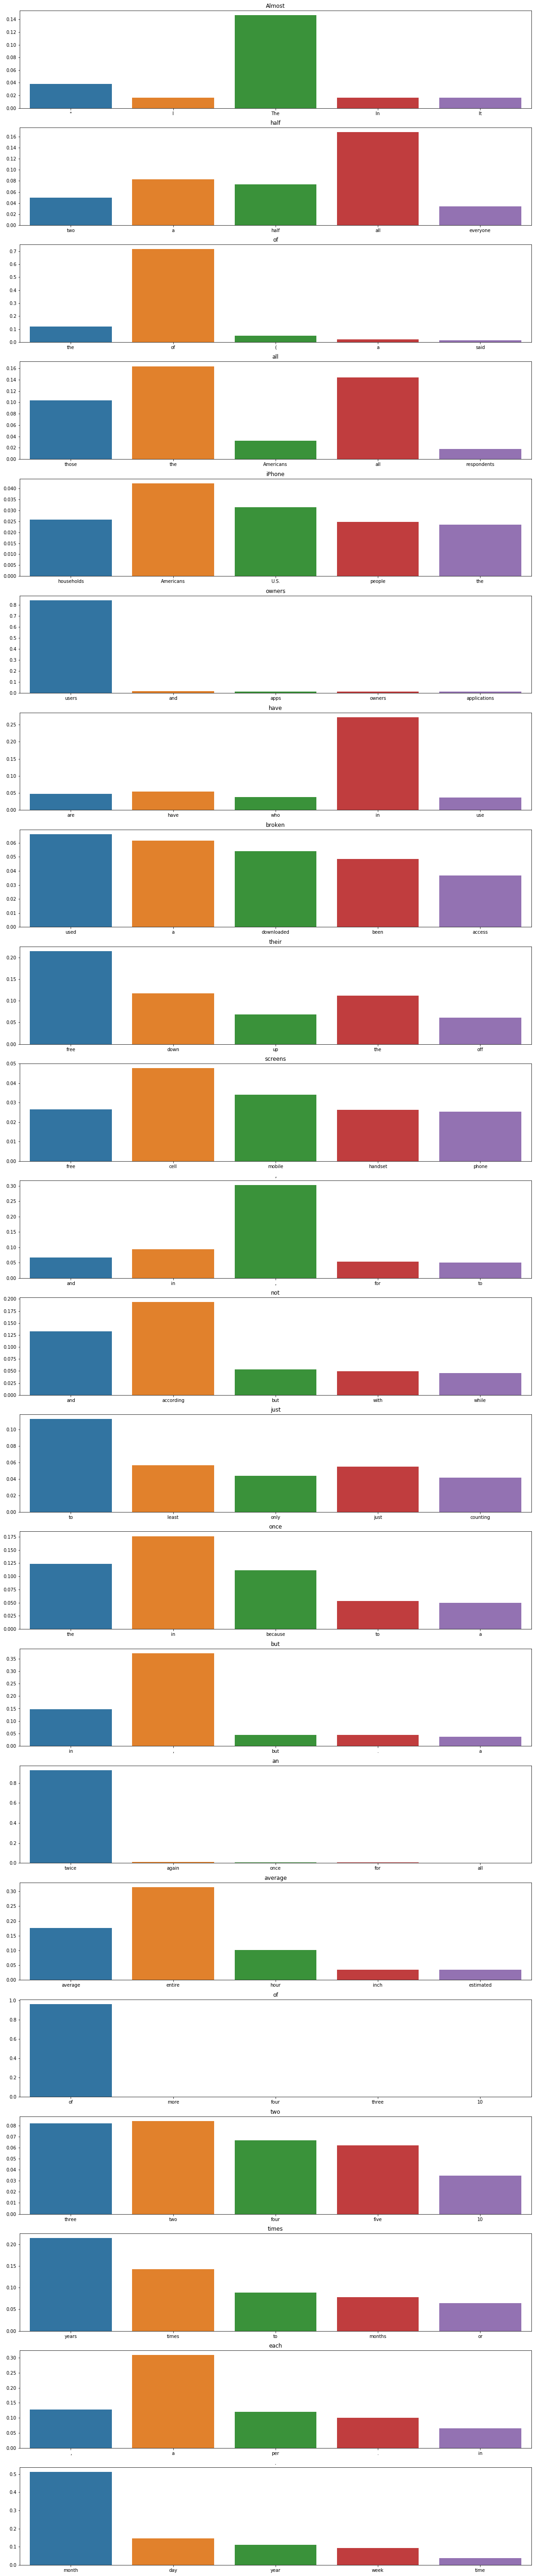

In [22]:
plt.figure(figsize=(20,140))
for i in range(example[0].shape[0]):
    source_word = inn[0][i]
    dist = example[0][i][0]
    words = np.array([elmo_vocab[index] for index in multi_argmax(dist, 5)])
    p = np.array([dist[index] for index in multi_argmax(dist, 5)])
    plt.subplot(30, 1,i+1)
    sns.barplot(x=words, y=p)
    plt.title(source_word)

In [ ]:
for i in range(example[0].shape[0]):
    print([elmo_vocab[index] for index in [np.argmax(example[0][i][1])]])

In [ ]:
"Almost half of all iPhone owners have broken their screens, not just once but an average of two times each."

In [ ]:
elmo_vocab[1]